<a href="https://colab.research.google.com/github/nrajmalwar/Project/blob/master/Session%204/First.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nishad Rajmalwar, Batch F6, nrajmalwar@gmail.com

###Planning and Expectations###

1.   We build a vanilla network using only Convolution and MaxPooling layers. Our aim is to figure a model architecture which reaches 99% validation accuracy.
2.   We can understand the receptive field at each layer and number of Convolution and MaxPooling layers that we can add at the most.
3.   We can figure out how to increase/decrese the number of channels
4.   We do not think about the number of parameters as of now.

# **Import Libraries and modules**

Install and import keras library

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


Important important APIs, functions and libraries

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D, GlobalAveragePooling2D, SeparableConv2D
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import mnist
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

### Load pre-shuffled MNIST data into train and test sets

Load and split the data into training and test set

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Print the shape of X_train (examples of the dataset) and plot the first image

(60000, 28, 28)


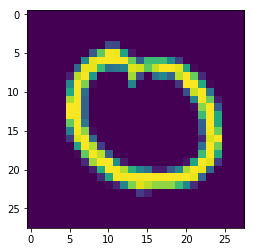

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[108])

Reshape the X_train and X_test to (m,  28, 28, 1) tensor

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

Change the values of X_train, X_test to float32 and normalize them between 0 and 1

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Print the first 10 elements of y_train which contains the class labels for X_train

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

Convert the values of Y_train and Y_test to one-hot vectors

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

#Model Building

Build a simple convolution model

In [0]:
model = Sequential()
 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) # Output size = 26; Receptive Field = 3

model.add(Convolution2D(64, 3, 3, activation='relu')) # 24; 5
model.add(Convolution2D(128, 3, 3, activation='relu')) # 22; 7

model.add(MaxPooling2D(pool_size=(2, 2))) # 11; 14
model.add(Convolution2D(32, 1, 1, activation='relu')) # 11; 14

model.add(Convolution2D(64, 3, 3, activation='relu')) # 9; 16
model.add(Convolution2D(128, 3, 3, activation='relu')) # 7; 18

model.add(Convolution2D(10, 1, activation='relu')) 
model.add(Convolution2D(10, 7))
model.add(Flatten())
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 1), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  # This is added back by Interactiv

Print the model summary

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 32)        4128      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 9, 9, 64)          18496     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 128)         73856     
__________

Compile the model with the loss function, the optimizer and the metrics used

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

#Model Training

Fit the model on X_train and Y_train for 10 epochs with a batch size of 32

In [0]:
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=32, epochs=10, verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 19s 322us/step - loss: 0.1506 - acc: 0.9542 - val_loss: 0.0788 - val_acc: 0.9764
Epoch 2/10
60000/60000 [==============================] - 15s 253us/step - loss: 0.0520 - acc: 0.9845 - val_loss: 0.0394 - val_acc: 0.9875
Epoch 3/10
60000/60000 [==============================] - 15s 244us/step - loss: 0.0387 - acc: 0.9881 - val_loss: 0.0449 - val_acc: 0.9856
Epoch 4/10
60000/60000 [==============================] - 15s 245us/step - loss: 0.0308 - acc: 0.9902 - val_loss: 0.0334 - val_acc: 0.9890
Epoch 5/10
60000/60000 [==============================] - 15s 244us/step - loss: 0.0252 - acc: 0.9920 - val_loss: 0.0365 - val_acc: 0.9901
Epoch 6/10
60000/60000 [==============================] - 15s 242us/step - loss: 0.0208 - acc: 0.9937 - val_loss: 0.0341 - val_acc: 0.9905
Epoch 7/10
60000/60000 [==============================] - 15s 247us/

#Model Evaluation

Evaluate the model on the test set

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

Print the evaluation score of the model

In [0]:
print(score)

[0.03242373200838392, 0.9908]


#Model Prediction

Use the model to predict the class labels of test set

In [0]:
y_pred = model.predict(X_test)

Compare the predicted values and the actual values

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[8.64288068e-12 6.43996521e-13 1.40800029e-08 5.20406429e-09
  6.72493804e-15 1.71365421e-14 1.51653032e-20 1.00000000e+00
  1.10474156e-11 7.09427572e-10]
 [1.61437094e-14 7.84606668e-12 1.00000000e+00 7.78453602e-15
  2.41748577e-16 8.14982930e-20 7.39757715e-14 2.87450350e-18
  1.42564834e-13 2.61521400e-22]
 [1.44598528e-10 9.99994874e-01 2.72794338e-08 2.07822631e-11
  5.90505422e-08 1.78524451e-09 1.10789005e-08 5.10842528e-06
  5.45577521e-08 4.86555018e-09]
 [9.99999404e-01 3.87444157e-12 1.37254097e-10 1.17384436e-10
  2.05150966e-11 1.95705852e-09 6.19751177e-07 1.57598967e-14
  3.56579033e-09 2.03874473e-09]
 [5.29684760e-12 3.35104548e-11 2.46423537e-16 3.90452712e-15
  9.99999881e-01 1.70313731e-12 2.35020536e-09 8.47415562e-13
  1.52233639e-07 4.39778297e-10]
 [7.92412837e-12 9.99987364e-01 1.95874250e-08 4.77863062e-12
  4.42188281e-07 9.06311692e-11 1.86953724e-08 1.20095256e-05
  1.23831299e-07 7.07093717e-10]
 [7.46758624e-20 1.50232008e-12 6.16839303e-16 2.10097672e

###Results###
1. Our model reaches 99.17 validation accuracy which is a good start. It is safe to say this architecture should work reasonably well.
2. For the given input image size, we were able to 8 Convolution layers and 1 MaxPooling layer.
3. We have increased the number of channels with each layer and then added a bottleneck with 1x1 layer.
4. We got 195k parameters which is not a concern as of now. In the next model, we will aim to reduce this number to below 15k.